In [1]:
## Price prediction using different regressions from scikit library
## Load data from yahoo finance

import datetime

import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

import math
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Loading data from Yahoo

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 8, 30)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005


### Plotting data and mean for full period

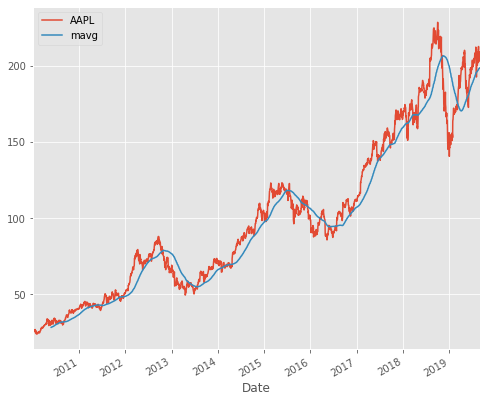

In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mean')
plt.legend()

In [4]:
dfreg = df.loc[:, ['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864
2010-01-11,26.195114,115557400.0,2.165531,-1.264095
2010-01-12,25.897146,148614900.0,1.612746,-0.702707
2010-01-13,26.262434,151473000.0,3.242343,1.337373
2010-01-14,26.110340,108223500.0,0.687577,-0.323641


### Preparing data for teaching and predicting

In [5]:
## Pre-Processing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# Separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

### Using three type of regressions for teaching

1. Linear regression is the simplest and most popular regression type and as you will see further gives the best results.

2. K-Neighbors regression

3. Quadratic regression with three features

Used 99 percent of our data for last approximately 9 years.

In [6]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [7]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [8]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

### Predicting data using last one percent of our data

In [9]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

### Plotting predict results for last 1 percent of data

As you can see the results are very close to the real situation in the market.
Other two types of regressions will show similar results, but linear regression gives the closest results.

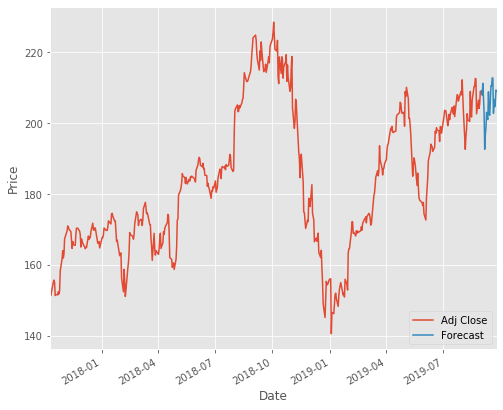

In [10]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()